In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [1]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import sys
import os
sys.path.append(os.path.abspath(".."))

from ModelComponents.spectroArchitectures import MLP_spectro
from ModelComponents.dataset_spectro import FolderAudioDataset
from ModelComponents.training import train
from ModelComponents.utils import plot_training_curves

In [2]:
datasets_path = "../../tp_tap_new/datasets"
preprocessed_path = os.path.join(datasets_path,"preprocessed/")

results_path = "../results/MLP_spectro_v0" # changer l'emplacement du dossier en fonction du modèle entraîné
checkpoint_path = os.path.join(results_path,"model.pth")
training_plot_save_path = os.path.join(results_path,"Performance.png")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dropout_p = 0.5

model_MLP = MLP_spectro(dropout_p=dropout_p).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_MLP.parameters(), lr=0.001)

num_epochs = 10
batch_size = 100
noise_prob_train = 0.8
noise_prob_test = 0

In [3]:
data_train = FolderAudioDataset(os.path.join(preprocessed_path,"train"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_train)
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)


data_test = FolderAudioDataset(os.path.join(preprocessed_path,"test"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_test)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

In [5]:
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(model_MLP, train_loader, test_loader, criterion, optimizer, checkpoint_path, device, num_epochs, cnn=False)

Epoch [1/10]
Train Loss: 0.7200, Train Acc: 83.62%
Test Loss: 0.7167, Test Acc: 83.28%

Best model saved with accuracy: 83.28%
Epoch [2/10]
Train Loss: 0.7135, Train Acc: 83.62%
Test Loss: 0.7165, Test Acc: 83.28%

Epoch [3/10]
Train Loss: 0.7107, Train Acc: 83.62%
Test Loss: 0.7168, Test Acc: 83.28%

Epoch [4/10]
Train Loss: 0.7098, Train Acc: 83.62%
Test Loss: 0.7174, Test Acc: 83.28%

Epoch [5/10]
Train Loss: 0.7090, Train Acc: 83.62%
Test Loss: 0.7167, Test Acc: 83.28%

Epoch [6/10]
Train Loss: 0.7080, Train Acc: 83.62%
Test Loss: 0.7166, Test Acc: 83.28%

Epoch [7/10]
Train Loss: 0.7079, Train Acc: 83.62%
Test Loss: 0.7168, Test Acc: 83.28%

Epoch [8/10]
Train Loss: 0.7076, Train Acc: 83.62%
Test Loss: 0.7167, Test Acc: 83.28%

Epoch [9/10]
Train Loss: 0.7069, Train Acc: 83.62%
Test Loss: 0.7165, Test Acc: 83.28%

Epoch [10/10]
Train Loss: 0.7070, Train Acc: 83.62%
Test Loss: 0.7167, Test Acc: 83.28%



Plot saved to ../results/MLP_spectro_v0/Performance.png


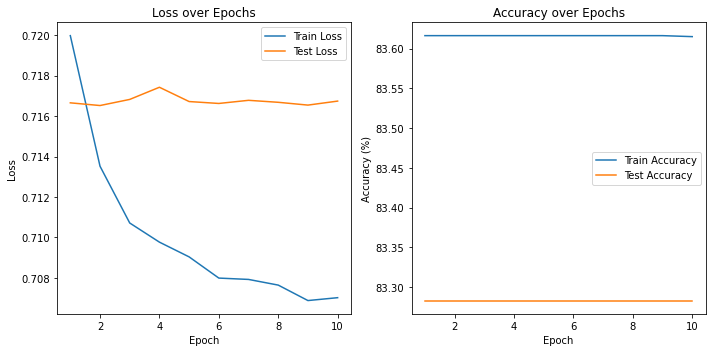

In [6]:
plot_training_curves(train_loss_list, test_loss_list, train_acc_list, test_acc_list, num_epochs, training_plot_save_path)